In [76]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
# load dataset 
car_df = pd.read_csv('car.csv')

In [78]:
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [79]:
car_df.shape

(11914, 16)

In [80]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [81]:
car_df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [82]:
# drop market category column 
car_df.drop(['Market Category','Model','Make'], axis = 1, inplace = True)

In [83]:
# the null or missing values are small so we can drop them
car = car_df.dropna()

In [84]:
car.isna().sum()

Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [85]:
car = car.rename(columns={"MSRP":"Price"})

In [86]:
car.head()

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# EDA

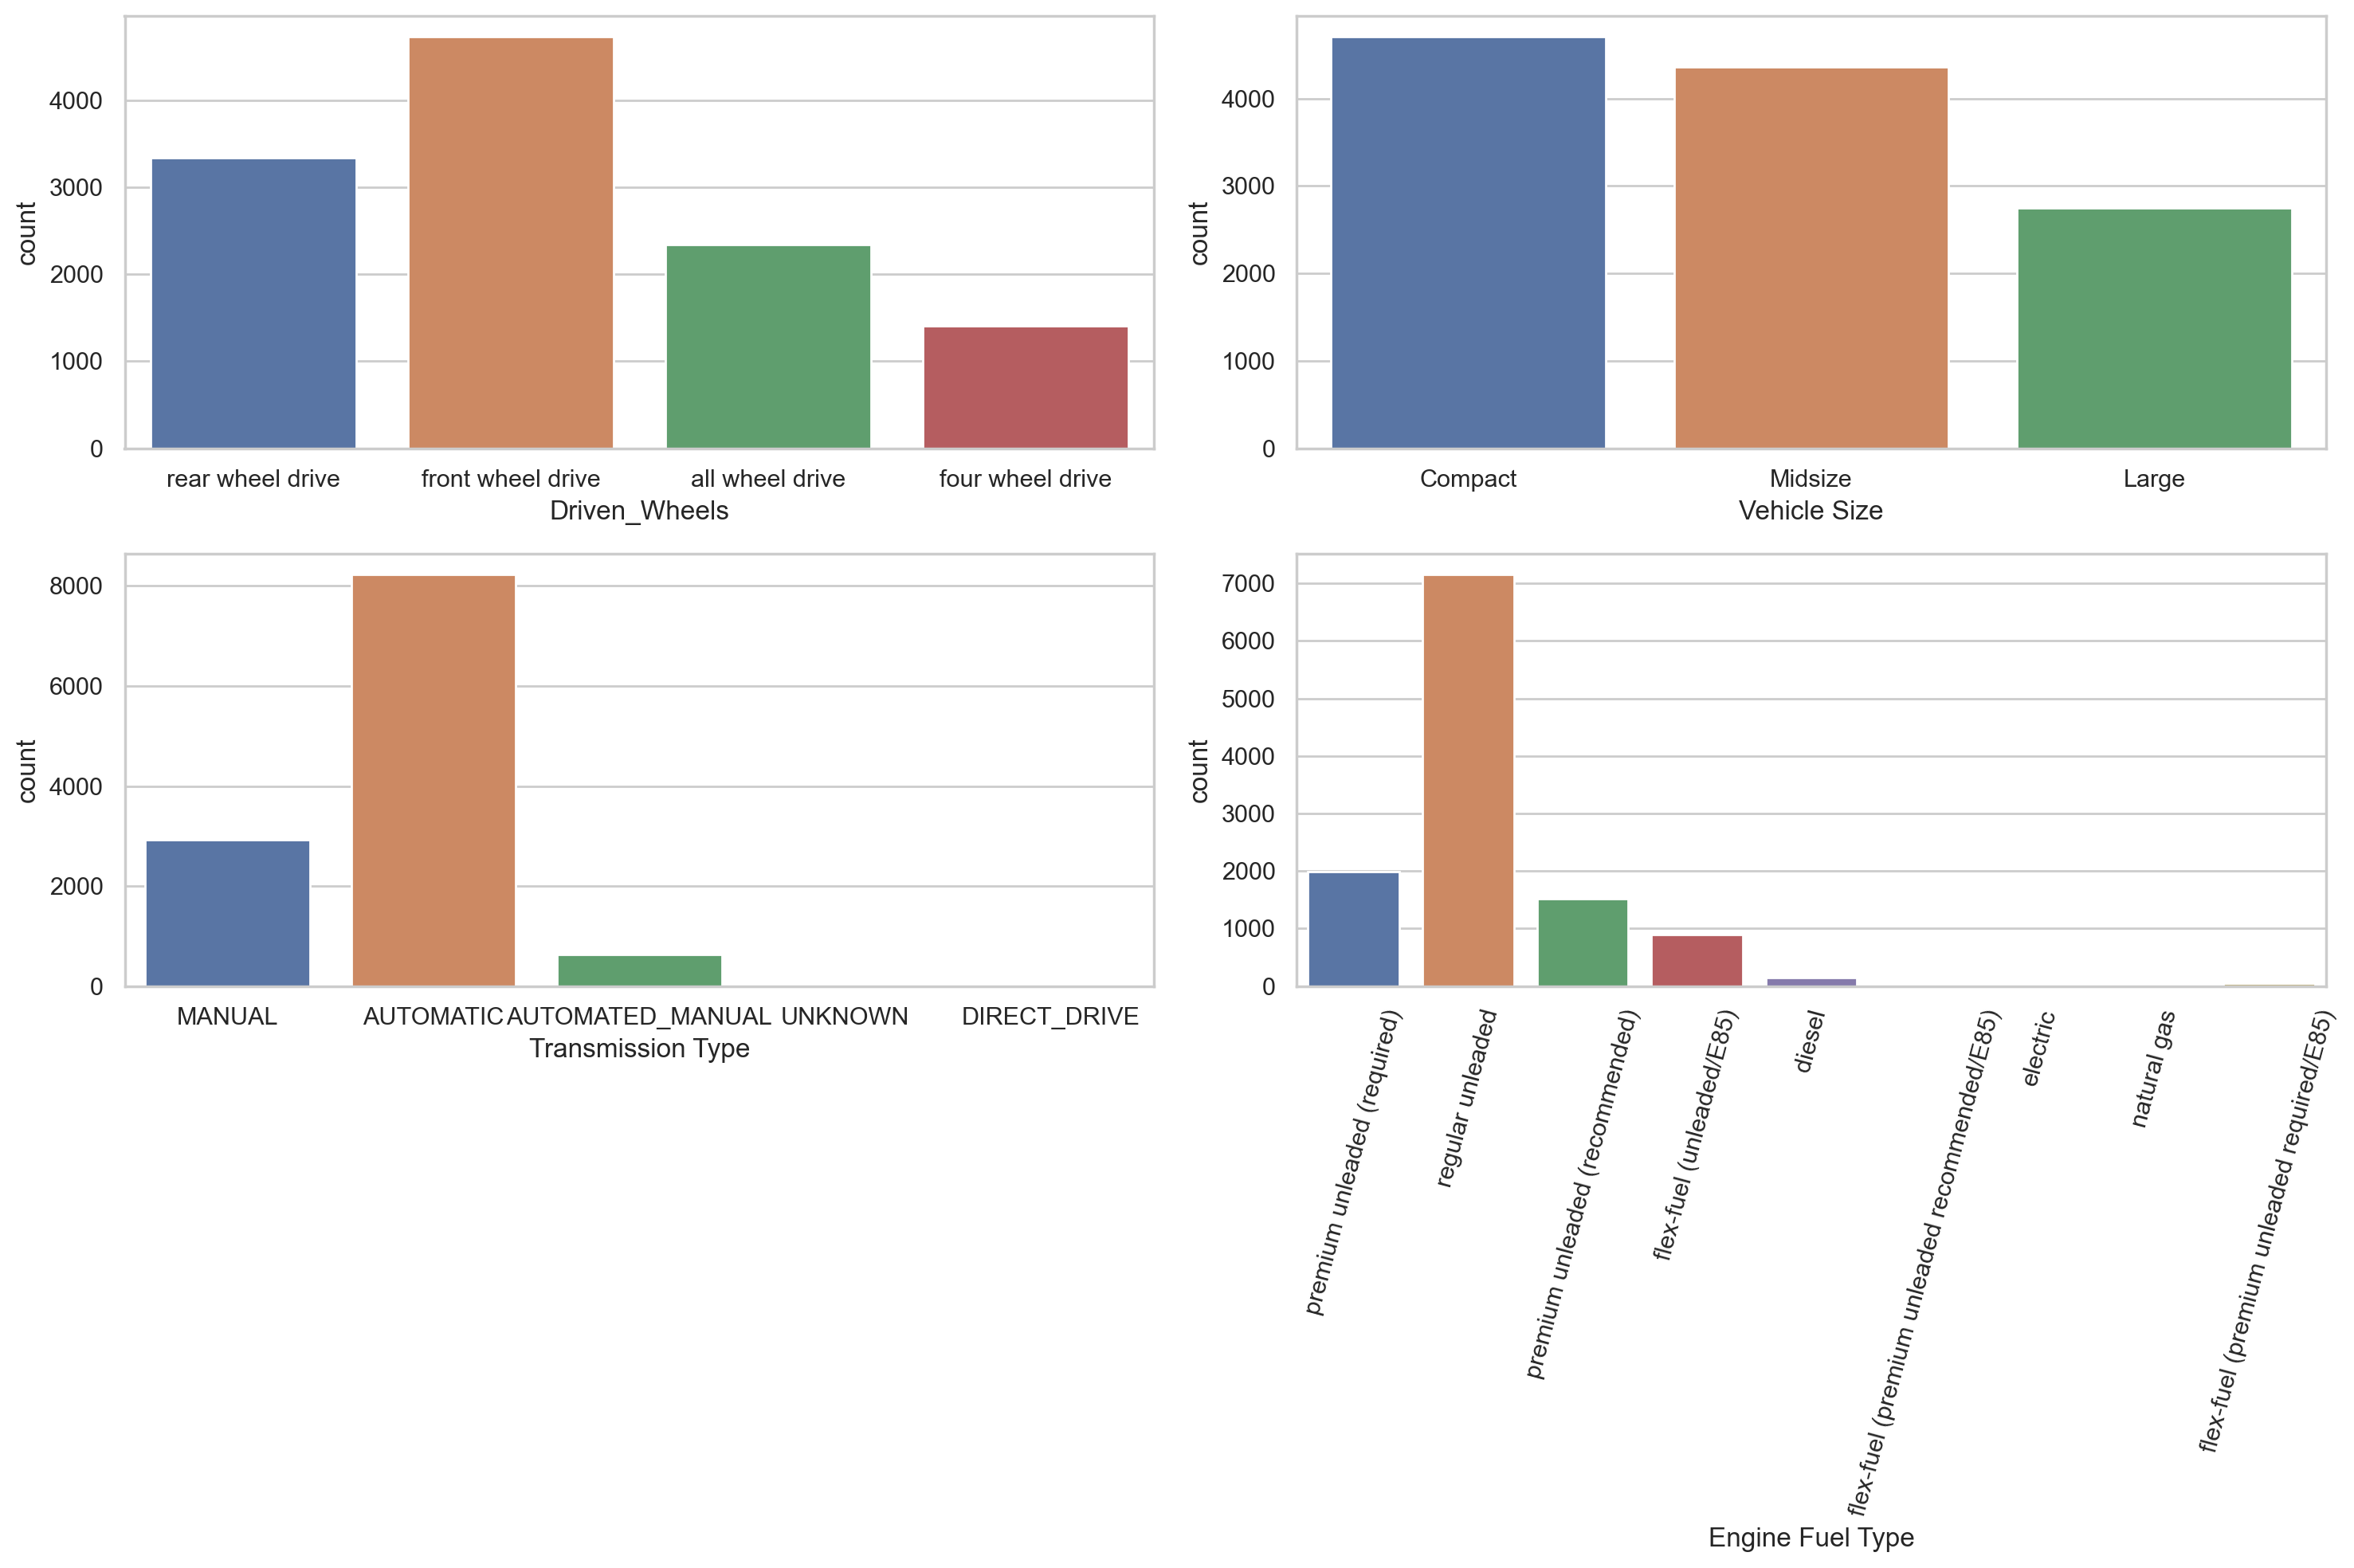

In [87]:
# visualize the categorical columns

plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = 200

fig, axe = plt.subplots(2,2)
sns.countplot(car['Vehicle Size'],ax=axe[0,1])
sns.countplot(car['Driven_Wheels'],ax=axe[0,0])
sns.countplot(car['Transmission Type'],ax=axe[1,0])
sns.countplot(car['Engine Fuel Type'], ax=axe[1,1])
plt.xticks(rotation=75)
plt.tight_layout()

plt.show()


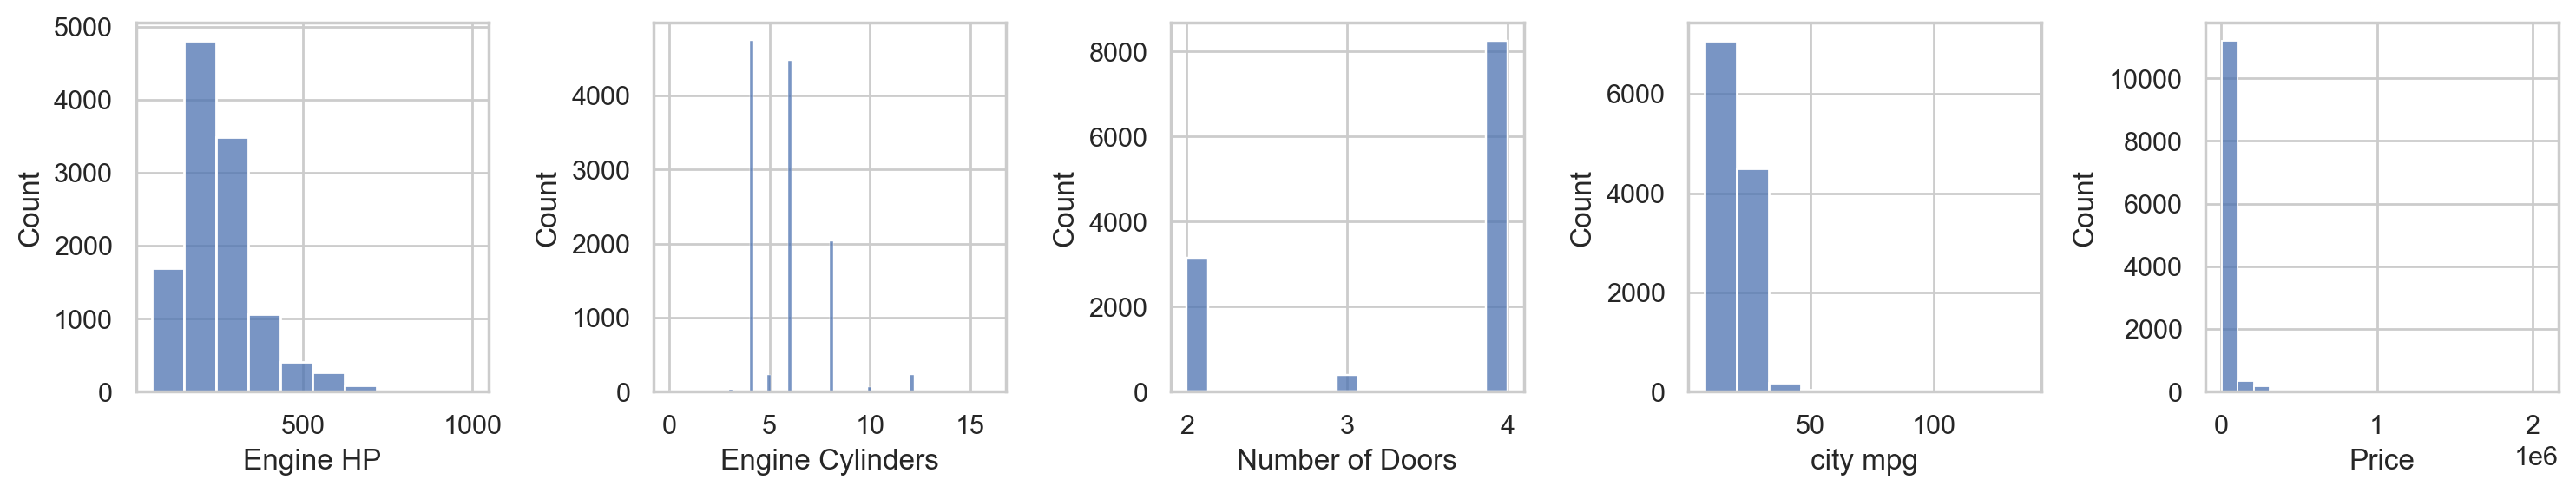

In [88]:
plt.rcParams['figure.figsize']=(15,3)

sns.set_theme(style='whitegrid')
fig, axe = plt.subplots(1,5)
sns.histplot(car['Engine HP'],ax=axe[0],bins=10)
sns.histplot(car['Engine Cylinders'],ax=axe[1])
sns.histplot(car['Number of Doors'],ax=axe[2])
sns.histplot(car['city mpg'],ax=axe[3],bins=10)
sns.histplot(car['Price'],ax=axe[4],bins=20)
plt.tight_layout()
plt.show()

In [94]:
vars = car[['Engine HP','Engine Cylinders','Number of Doors','city mpg','highway MPG','Popularity','Year','Price']]

In [95]:
vars.corr()['Price']

Engine HP           0.661827
Engine Cylinders    0.544002
Number of Doors    -0.127316
city mpg           -0.225317
highway MPG        -0.198962
Popularity         -0.048609
Year                0.227327
Price               1.000000
Name: Price, dtype: float64

Only 'Engine HP', 'Year' and 'Engine Cylinders' correlate positively with the price of car.
Feather statistical analysis needs to be done the rest of the continuous features

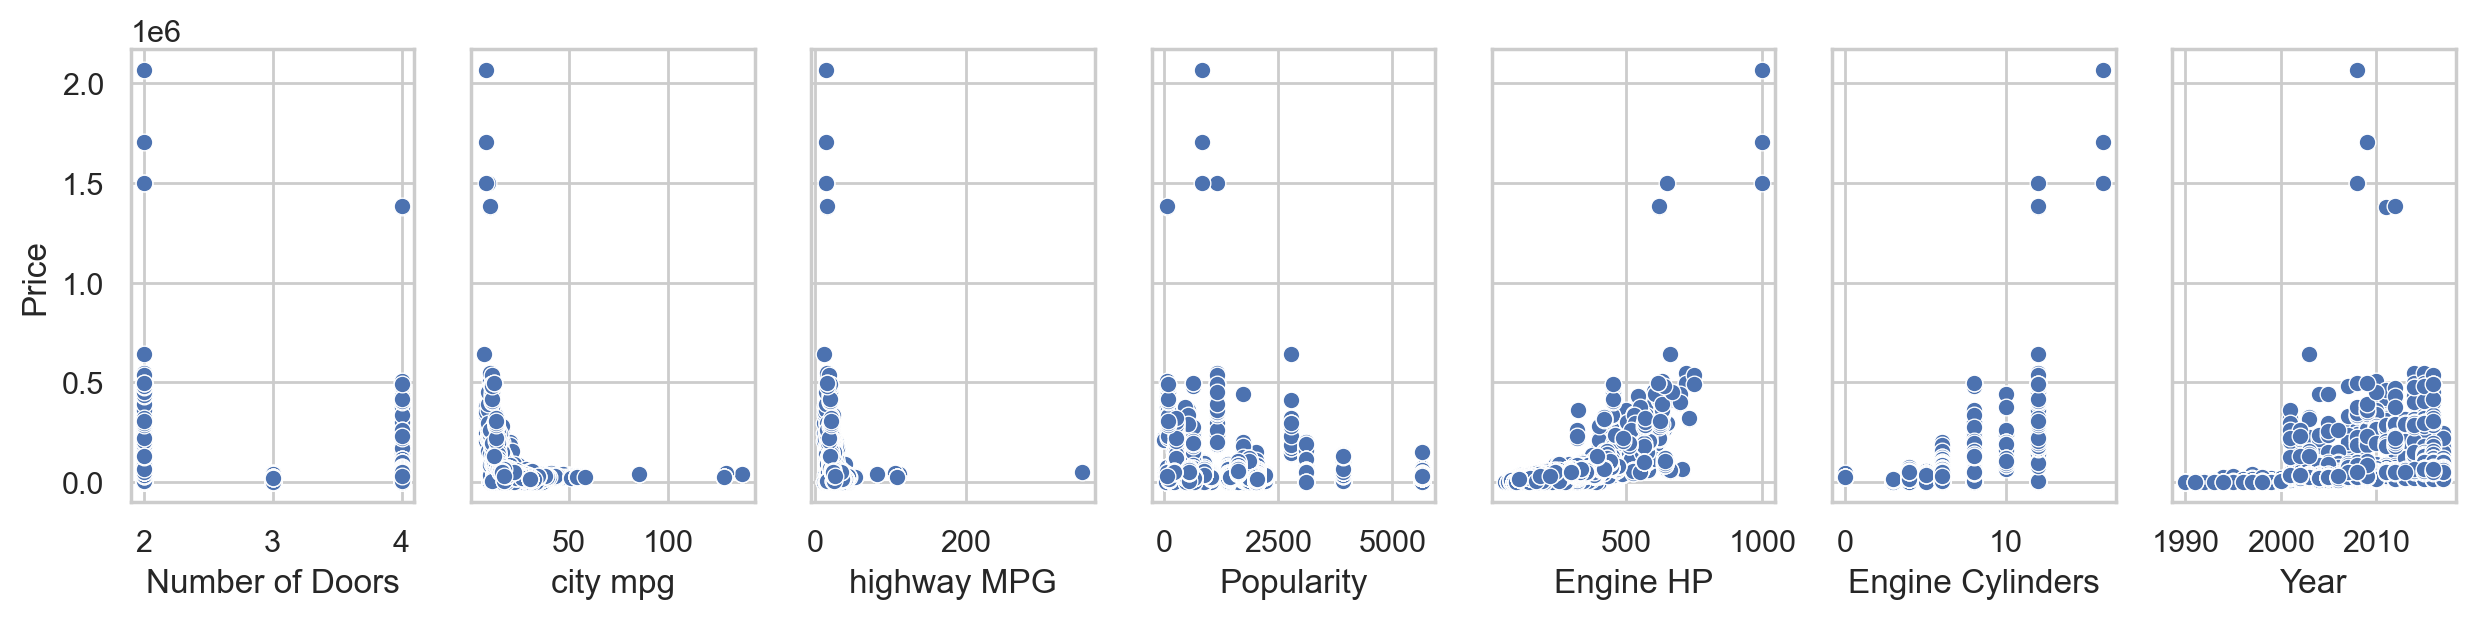

In [91]:
fig, ax = plt.subplots(1,7, sharey=True)
sns.scatterplot(car['Number of Doors'],car['Price'],ax=ax[0])
sns.scatterplot(car['city mpg'],car['Price'],ax=ax[1])
sns.scatterplot(car['highway MPG'],car['Price'], ax=ax[2])
sns.scatterplot(car['Popularity'],car['Price'],ax=ax[3])
sns.scatterplot(car['Engine HP'],car['Price'],ax=ax[4])
sns.scatterplot(car['Engine Cylinders'],car['Price'],ax=ax[5])
sns.scatterplot(car['Year'],car['Price'],ax=ax[6])
#plt.tight_layout()
plt.show()

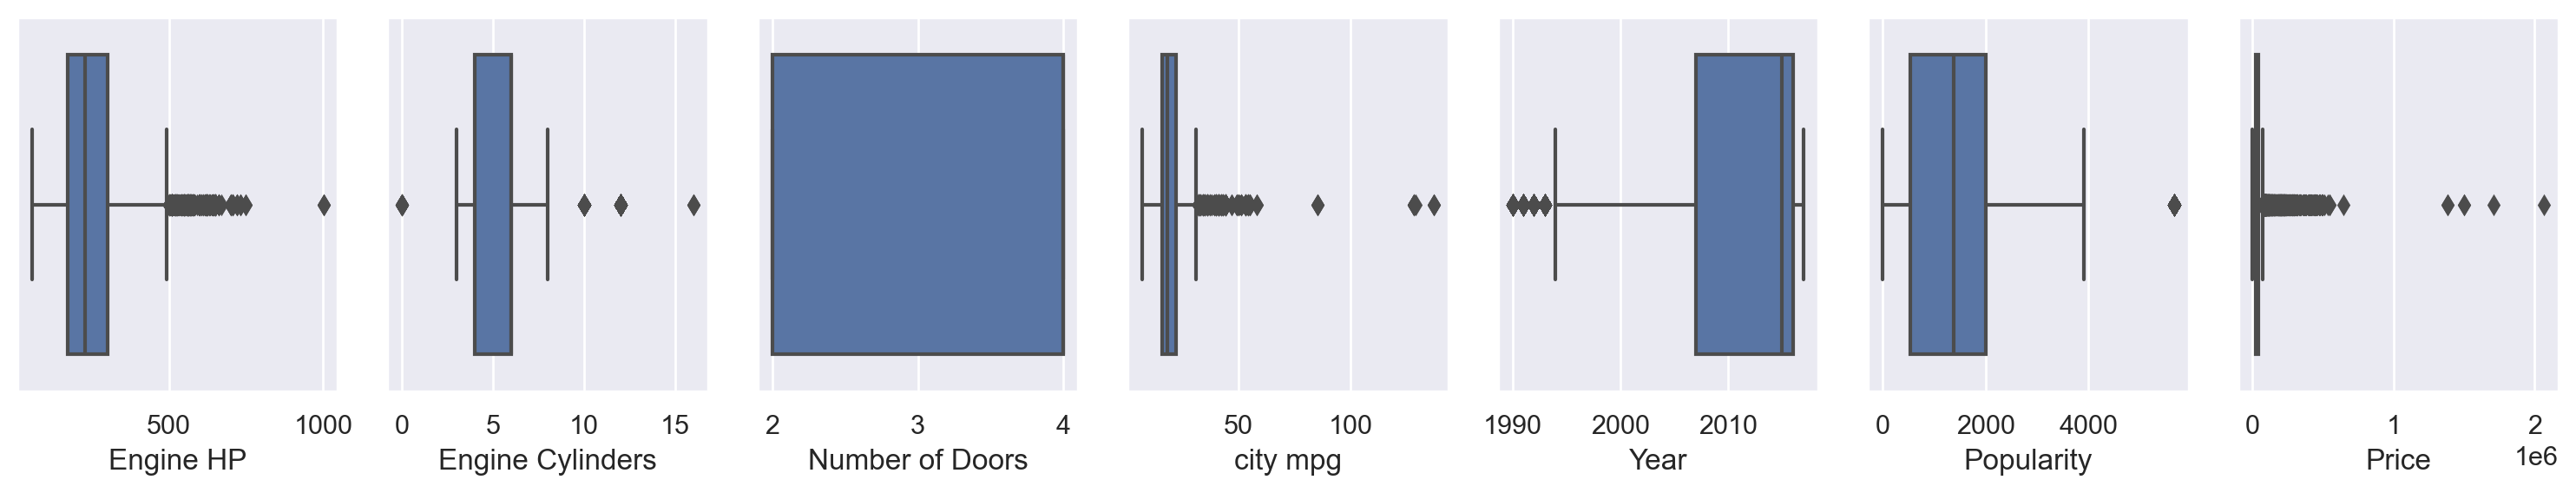

In [98]:
plt.rcParams['figure.figsize']=(15,3)

fig, axe = plt.subplots(1,7)
sns.boxplot(car['Engine HP'],ax=axe[0])
sns.boxplot(car['Engine Cylinders'],ax=axe[1])
sns.boxplot(car['Number of Doors'],ax=axe[2])
sns.boxplot(car['city mpg'],ax=axe[3])
sns.boxplot(car['Year'],ax=axe[4])
sns.boxplot(car['Popularity'],ax=axe[5])
sns.boxplot(car['Price'],ax=axe[6])

plt.tight_layout()
plt.show()

There are some outliers in the continous variables and needs to be removed

In [220]:
# function to remove outliers
def remove_outlier(data):
    for col in data.columns:
        if data[col].dtypes in ['float64','int64']:
            
            Q1 = np.percentile(data[col],25)
            Q3 = np.percentile(data[col],75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound = Q3+1.5*IQR
            data =data[(data[col]>lower_bound)& (data[col] <upper_bound)]
    return data

In [221]:
car_df = remove_outlier(car)

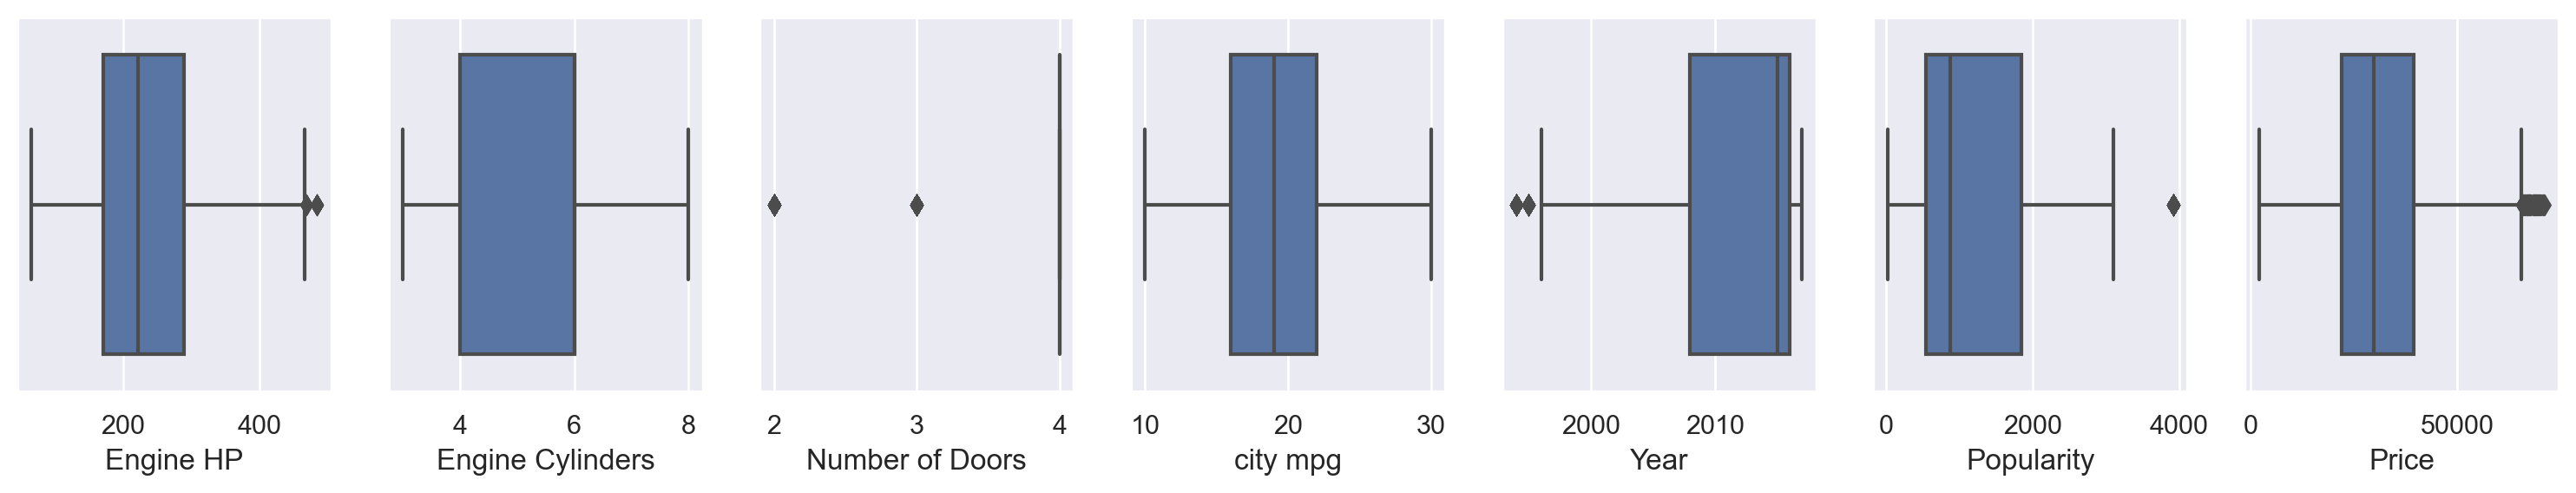

In [222]:
# visualize the data after removing outliers
plt.rcParams['figure.figsize']=(15,3)

fig, axe = plt.subplots(1,7)
sns.boxplot(car_df['Engine HP'],ax=axe[0])
sns.boxplot(car_df['Engine Cylinders'],ax=axe[1])
sns.boxplot(car_df['Number of Doors'],ax=axe[2])
sns.boxplot(car_df['city mpg'],ax=axe[3])
sns.boxplot(car_df['Year'],ax=axe[4])
sns.boxplot(car_df['Popularity'],ax=axe[5])
sns.boxplot(car_df['Price'],ax=axe[6])

plt.tight_layout()
plt.show()

# Preprocess the data for machine learning

In [223]:
# function to change categorical to numerical
def convert_cat_num(data):
    for col in data.columns:
        if data[col].dtypes in ['object']:
            data[col] = data[col].astype('category').cat.codes
    return data

In [224]:
# convert categorical data in to numerical
car_df =convert_cat_num(car_df)

In [225]:
car_df.head()

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135
1,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650
2,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350
3,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450
4,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500


In [226]:
# Divide the data into feature and target
X = car_df.iloc[:,:-1]
Y = car_df.iloc[:,-1]

In [227]:
X.head()

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916
1,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916
2,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916
3,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916
4,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916


In [228]:
Y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: Price, dtype: int64

In [229]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [230]:
# divide the data into train and test sets
from sklearn.model_selection import train_test_split


In [231]:
x_train,x_test,y_train,y_test =train_test_split(X,Y, test_size=0.20,random_state=42)

In [232]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((7134, 12), (1784, 12), (7134,), (1784,))

# Implement the machine learning algorithm

In [233]:
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [234]:
# function for models
def get_model(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    model_score = print('Model score: ',model.score(x_test,y_test))
    mse = print('Mean square error:', mean_squared_error(y_test,y_pred))
    rmse =print('Root mean squre error: ', np.sqrt(mean_squared_error(y_test,y_pred)))
    sns.regplot(y_test,y_pred)
    pickle.dump(model, open('model.pkl','wb'))
    return model_score, mse, rmse

In [235]:
# initialize the algorithms
rf = RandomForestRegressor()
xgb = XGBRegressor()
svr = SVR()

Model score:  0.9392514396487626
Mean square error: 13462265.675972918
Root mean squre error:  3669.096029810738


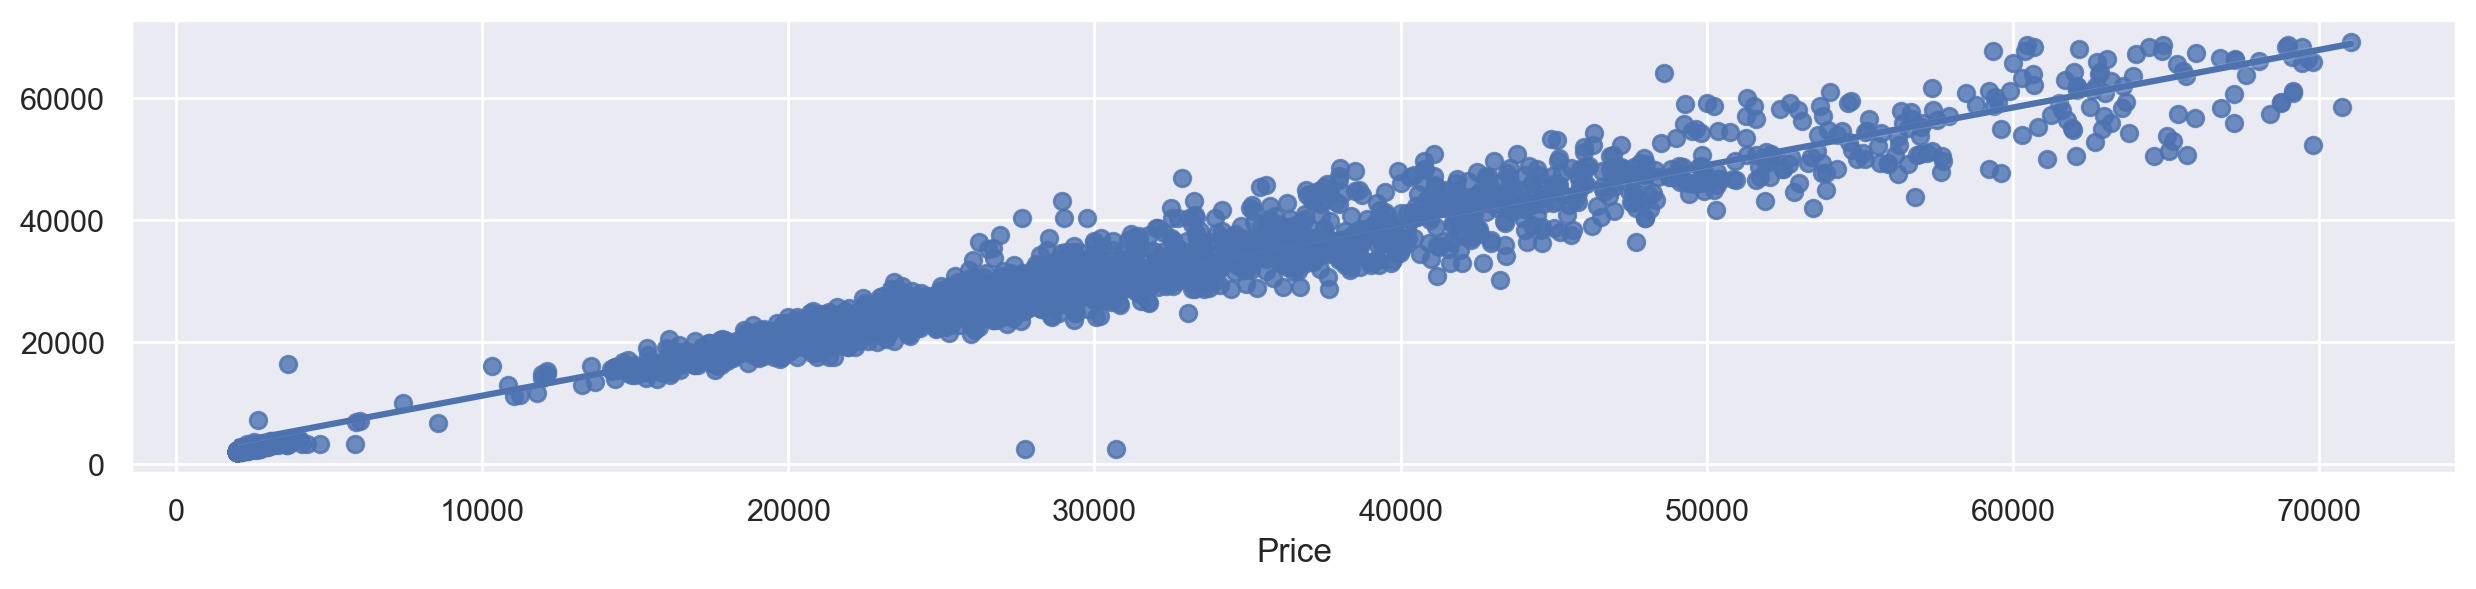

In [236]:
# fit rf
rf_model = get_model(rf)


Model score:  0.023742247148055173
Mean square error: 216344900.3751324
Root mean squre error:  14708.667525480763


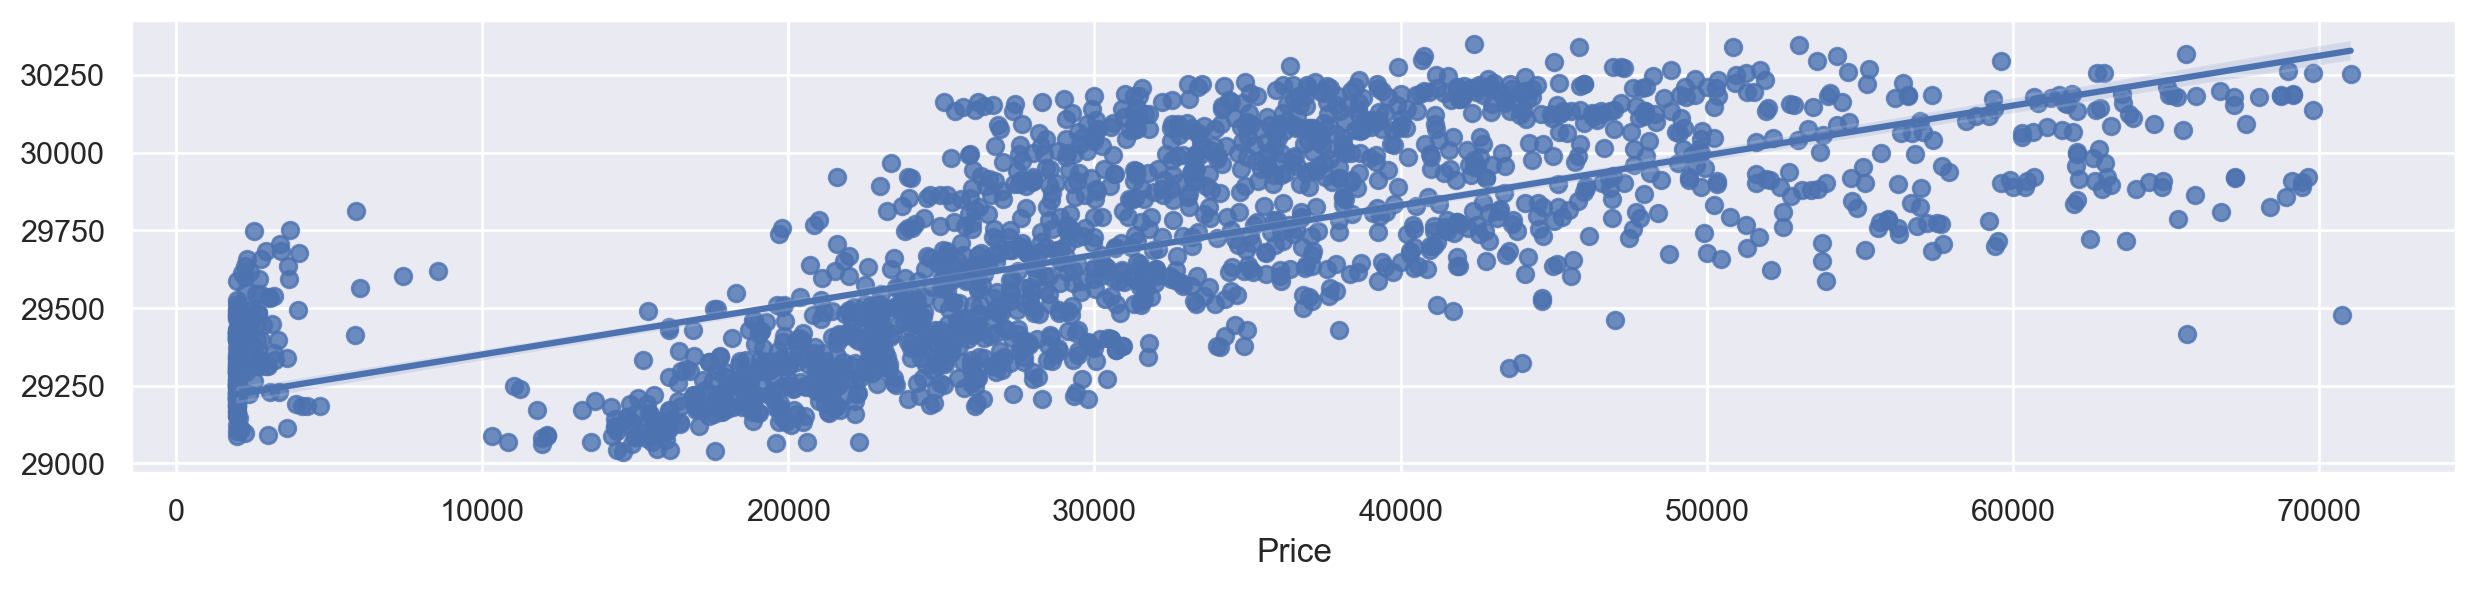

In [237]:
svr_model = get_model(svr)

Model score:  0.9528339037103675
Mean square error: 10452305.626311349
Root mean squre error:  3233.002571343139


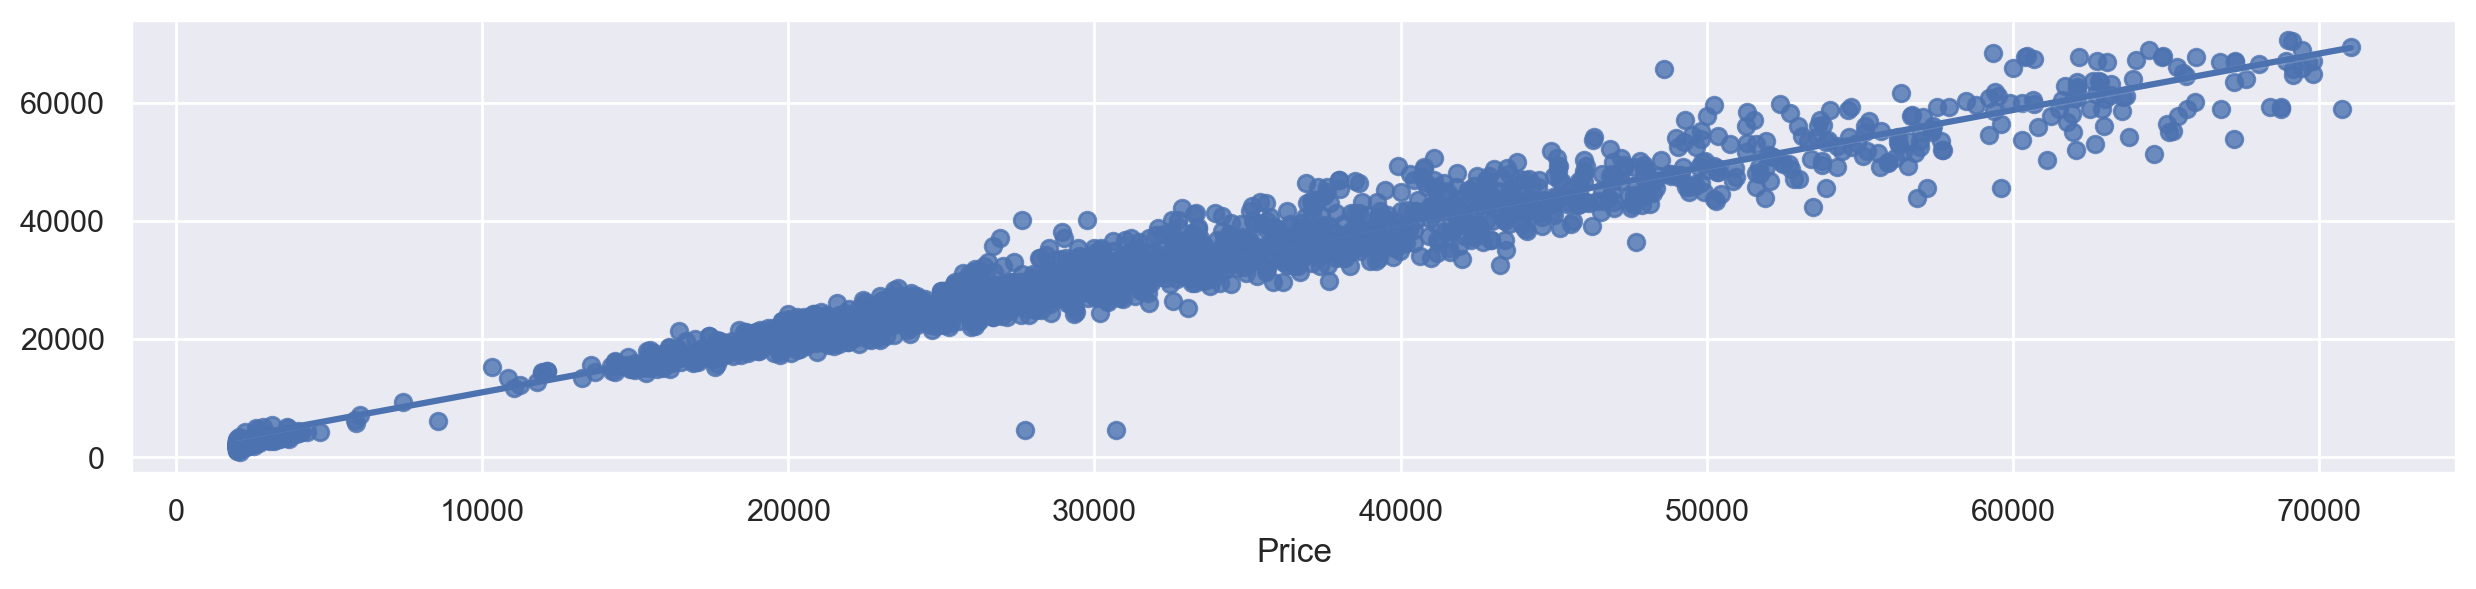

In [238]:
xgb_model = get_model(xgb)

In [239]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [240]:
# load xgb regressor model
xgb_model = pickle.load(open('model.pkl','rb'))
scaler = pickle.load(open('scaler.pkl','rb'))

In [247]:
test_data =[[2009,6,335.0,6.0,3,3,2.0,0,8,26,19,3916]]
scale_test = scaler.transform(test_data)

In [248]:
pred_price = xgb_model.predict(scale_test)

In [249]:

pred_price

array([43562.605], dtype=float32)